In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [14]:
votes = pd.DataFrame.from_csv('AnsVotes_TSeries.csv', index_col=None)
votes.head(10)

,QuestionId,AnsId,Age_vot,AnsWordCount,AcceptedAnsId,QScore,QVotes,Score,Votes,Upvotes,...,CumScore,ReScore,QReScore,Comments,AnsRank,ReScore_rank,Ans_count,Pbias,DRank,EPbias
0,1,56,0,201,56,0,0,2,2,2,...,0,0,0,0,1,1,1,1,0,1
1,2,10,0,145,10,0,0,3,3,3,...,0,0,0,0,1,1,1,1,0,1
2,2,10,0,145,10,0,0,3,3,3,...,0,0,0,0,1,1,1,1,0,1
3,3,9,0,25,109,0,0,4,4,4,...,0,0,0,0,1,1,1,1,0,1
4,7,16,0,45,2977,0,0,3,3,3,...,0,0,0,0,1,1,1,1,0,1
5,14,20,0,28,20,0,0,7,7,7,...,0,0,0,0,1,1,1,1,0,1
6,18,33,0,133,33,0,0,3,3,3,...,0,0,0,0,1,1,1,1,0,1
7,18,33,0,133,33,0,0,3,3,3,...,0,0,0,0,1,1,1,1,0,1
8,18,33,0,133,33,0,0,3,3,3,...,0,0,0,0,1,1,1,1,0,1
9,21,80,0,43,80,0,0,1,1,1,...,0,0,0,0,1,1,1,1,0,1


In [15]:
users = pd.DataFrame.from_csv('user_reputation_votes.csv', index_col=None)
users.head(10)

,AnsId,QContributed,AnsContributed,ScoreRcvQ,VotRcvQ,ScoreRcvAns,VotRcvAns,Age
0,1,1,0,1,1,0,0,0
1,55,0,1,0,0,1,1,0
2,55,0,1,0,0,2,2,0
3,55,0,1,0,0,3,3,0
4,55,0,1,0,0,4,4,0
5,55,0,1,0,0,5,5,0
6,55,0,1,0,0,6,6,0
7,55,0,1,0,0,7,7,0
8,55,0,1,0,0,8,8,0
9,55,0,1,0,0,9,9,0


In [16]:
votes.columns

Index([u'QuestionId', u'AnsId', u'Age_vot', u'AnsWordCount', u'AcceptedAnsId',
       u'QScore', u'QVotes', u'Score', u'Votes', u'Upvotes', u'Downvotes',
       u'CumVotes', u'CumScore', u'ReScore', u'QReScore', u'Comments',
       u'AnsRank', u'ReScore_rank', u'Ans_count', u'Pbias', u'DRank',
       u'EPbias'],
      dtype='object')

In [114]:
#There can be posts/votes with deleted users, we avoid them here
m_votes = pd.merge(users, votes, how='inner', on=['AnsId'],suffixes=['_vot', '_user'])

get_head = lambda df: pd.DataFrame(dict(zip(df.iloc[0].index,[[e] for e in df.iloc[0].values])))
ff = lambda df: get_head(df.sort_values(by=["Age"],ascending=False))
votes_complete = m_votes[m_votes.Age_vot>=m_votes.Age].groupby(['AnsId','Age_vot']).apply(ff).reset_index(drop=True)
votes_complete.head()

,AcceptedAnsId,Age,Age_vot,AnsContributed,AnsId,AnsRank,AnsWordCount,Ans_count,Comments,CumScore,...,QuestionId,ReScore,ReScore_rank,Score,ScoreRcvAns,ScoreRcvQ,Upvotes,VotRcvAns,VotRcvQ,Votes
0,56,0,0,5,4,2,190,2,0,0,...,1,0.00,2,1,12,0,2,14,0,3
1,56,1436,1436,7,4,3,190,6,2,1,...,1,0.25,5,1,49,11,1,55,11,1
2,56,0,0,1,5,3,37,3,0,0,...,1,0.00,3,1,1,0,1,1,0,1
3,56,108,108,2,5,5,37,5,1,1,...,1,0.50,3,-1,-2,0,0,4,0,1
4,10,0,0,1,6,5,51,5,0,0,...,2,0.00,5,1,1,0,1,1,0,1


In [18]:
votes_complete.columns

Index([u'AcceptedAnsId', u'Age', u'Age_vot', u'AnsContributed', u'AnsId',
       u'AnsRank', u'AnsWordCount', u'Ans_count', u'Comments', u'CumScore',
       u'CumVotes', u'DRank', u'Downvotes', u'EPbias', u'Pbias',
       u'QContributed', u'QReScore', u'QScore', u'QVotes', u'QuestionId',
       u'ReScore', u'ReScore_rank', u'Score', u'ScoreRcvAns', u'ScoreRcvQ',
       u'Upvotes', u'VotRcvAns', u'VotRcvQ', u'Votes'],
      dtype='object')

In [34]:
#Age: age of vote on user post
#votes_complete.to_csv(path_or_buf='votes_ans_complete.csv')

In [19]:
votes_complete[['Age_vot','Ans_count','AnsWordCount','Comments']].describe()

,Age_vot,Ans_count,AnsWordCount,Comments
count,15159.000000,15159.000000,15159.000000,15159.000000
mean,182.389604,2.501418,126.575368,1.222772
std,355.905957,1.707417,129.736440,2.032405
min,0.000000,1.000000,3.000000,0.000000
25%,1.000000,1.000000,46.000000,0.000000
50%,5.000000,2.000000,89.000000,0.000000
75%,131.500000,3.000000,160.000000,2.000000
max,1504.000000,12.000000,2142.000000,18.000000


In [20]:
votes_complete[['ScoreRcvQ','VotRcvQ','ScoreRcvAns','VotRcvAns']].describe()

,ScoreRcvQ,VotRcvQ,ScoreRcvAns,VotRcvAns
count,15159.000000,15159.000000,15159.00000,15159.000000
mean,23.224553,23.840425,114.21855,118.612375
std,85.785722,87.881195,181.81826,186.426627
min,-1.000000,0.000000,-7.00000,1.000000
25%,0.000000,0.000000,9.00000,10.000000
50%,0.000000,0.000000,43.00000,46.000000
75%,12.000000,12.000000,144.00000,151.000000
max,1025.000000,1061.000000,1194.00000,1232.000000


In [23]:
votes_complete[['ReScore','QReScore','Pbias','EPbias']].describe()

,ReScore,QReScore,Pbias,EPbias
count,15159.000000,15159.000000,15159.000000,15159.000000
mean,0.450750,0.636234,0.756411,0.580921
std,0.388616,0.339490,0.299720,0.309246
min,-0.857143,-0.875000,0.090909,0.005837
25%,0.000000,0.500000,0.500000,0.330017
50%,0.500000,0.800000,1.000000,0.496412
75%,0.800000,0.875000,1.000000,1.000000
max,0.981132,0.979592,1.000000,1.000000


## Making Groups

In [128]:
qtls = votes_complete['Age_vot'].quantile([0,.25,.5,.75,1.0]).values
age_groups = dict(zip(zip(qtls,qtls[1:]),[e for e in range(len(zip(qtls,qtls[1:])))]))
def get_age_group(age):
    for l,u in age_groups:
        if l<=age and age<=u:
            return age_groups[(l,u)]

In [129]:
votes_complete['Age_group'] = votes_complete['Age_vot'].apply(get_age_group)

In [141]:
qtls

array([  0.00000000e+00,   1.00000000e+00,   5.00000000e+00,
         1.31500000e+02,   1.50400000e+03])

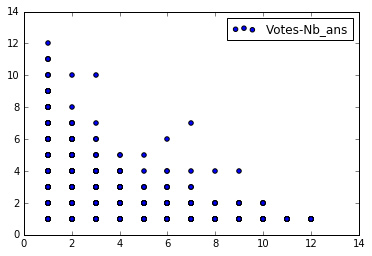

In [29]:
plt.scatter(votes_complete.Ans_count.values,votes_complete.Votes.values,label='Votes-Nb_ans')
plt.legend(loc='upper right')
plt.show()

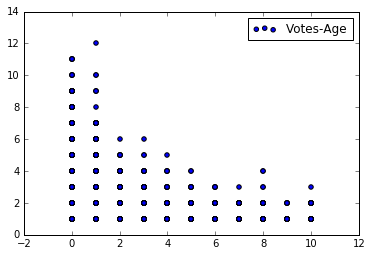

In [30]:
plt.scatter(votes_complete[votes_complete.Age_vot<=10].Age_vot.values,votes_complete[votes_complete.Age_vot<=10].Votes.values,label='Votes-Age')
plt.legend(loc='upper right')
plt.show()

In [132]:
ff1 = lambda df: pd.DataFrame(dict(zip(['mean','var','count'],[[e] for e in np.around([df['Votes'].mean(),df['Votes'].var(),df['Votes'].count()],decimals=3)])))
mean_var_v = votes_complete.groupby(['Ans_count','AnsRank']).apply(ff1).reset_index(level=[0,1],drop=False)
mean_var_v.head()

,Ans_count,AnsRank,count,mean,var
0,1,1,4819,1.911,2.063
0,2,1,2154,1.332,0.643
0,2,2,2465,1.325,0.550
0,3,1,1005,1.224,0.459
0,3,2,725,1.178,0.224


In [133]:
mean_var_v[['count','mean','var']].describe()

,count,mean,var
count,68.000000,68.000000,62.000000
mean,222.926471,1.091662,0.173371
std,710.105359,0.144593,0.330052
min,1.000000,1.000000,0.000000
25%,5.000000,1.000000,0.000000
50%,13.000000,1.030000,0.056000
75%,57.250000,1.134000,0.227000
max,4819.000000,1.911000,2.063000


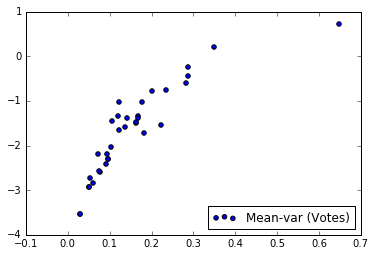

In [134]:
plt.scatter(np.log(mean_var_v[mean_var_v['count']>=5]['mean']),np.log(mean_var_v[mean_var_v['count']>=5]['var']),label='Mean-var (Votes)')
plt.legend(loc='lower right')
plt.show()

In [142]:
#votes = votes[ votes.age_vot>=3]
votes_r = votes_complete[votes_complete.Age_vot<=7]

# Votes/day on a given answer . (Context information: question, ans aggregates)

# Does user quality estimation boost/reduce votes with respect to quality?

                1         2         3         4         5         6
ReScore  1.468211  1.371319  1.343079  1.331610  1.327997  1.327188
DRank    0.000000 -0.184078 -0.166000 -0.161494 -0.155221 -0.147797


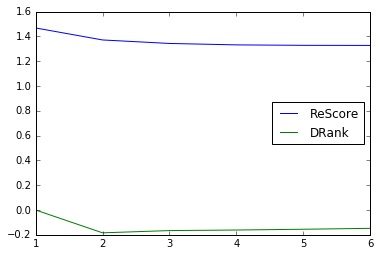

In [178]:
##DRank (+) crwod underestimates
##DRank (-) crowd overestimate
fml = 'np.log(Votes+1) ~ ReScore + DRank -1'
mat_1 = []
r2s_1 = []
acounts = [e+1 for e in range(6)]
for ans_count in acounts:
    mod = sm.OLS.from_formula(fml, votes_r[votes_r.Ans_count<=ans_count])
    rslt = mod.fit()
    mat_1.append(rslt.params)
    r2s_1.append(rslt.rsquared)
mat_1 = pd.DataFrame(mat_1, index=[str(x) for x in acounts])
print mat_1.T
mat_1.plot()
#underestimate produces relative drecrease (in Votes) of ~20% w/r to ReScore(ans_quality)

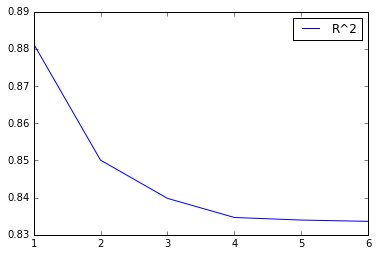

In [179]:
plt.plot(acounts,r2s_1,label='R^2')
plt.legend(loc='upper right')
plt.show()

# Do users correct for position bias?

                                        0         1         2         3
C(DRank, Treatment(reference=3))[-3.0]  0 -1.127022 -1.260221 -1.260221
C(DRank, Treatment(reference=3))[-2.0]  0 -1.422254 -1.543666 -1.543666
C(DRank, Treatment(reference=3))[-1.0]  0 -1.441663 -1.575474 -1.575474
C(DRank, Treatment(reference=3))[0.0]   0 -1.294816 -1.407859 -1.407859
C(DRank, Treatment(reference=3))[1.0]   0 -1.185583 -1.361128 -1.361128
C(DRank, Treatment(reference=3))[2.0]   0 -1.391898 -1.623452 -1.623452
C(DRank, Treatment(reference=3))[3.0]   0 -1.353570 -1.473558 -1.473558
EPbias                                  0  0.000000  0.000000  0.000000


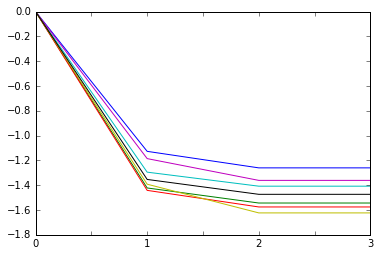

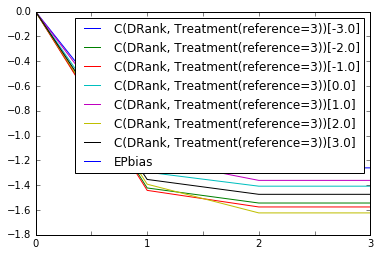

In [239]:
fml = 'np.log(Votes+1) ~ EPbias + C(DRank,Treatment(reference=3)) - 1 '
mat_2 = []
dev = []
mat_ps = []
acounts = [0,1,2,3]
for age in acounts:
    datas = votes_r[(votes_r.Ans_count==4) & (votes_r.Age_group <=age)]
    #mod = sm.OLS.from_formula(fml, votes_r[(votes_r.Ans_count==3) & (votes_r.Age_group <=age)])
    mod = smf.glm(fml, data=datas,
                  family=sm.families.Poisson(link=sm.families.links.log), offset=np.log(datas['Age_vot'] + 1))
    rslt = mod.fit(method='bfgs')
    mat_2.append(pd.Series([rslt.params[i] if p<=0.05 else 0 for i,p in enumerate(rslt.pvalues)],index=rslt.params.index))
    dev.append(rslt.deviance)
    mat_ps.append(rslt.pvalues)
mat_2 = pd.DataFrame(mat_2, index=[str(x) for x in acounts])
mat_ps = pd.DataFrame(mat_ps, index=[str(x) for x in acounts])
print mat_2.T
mat_2.plot(legend=False)
mat_2.plot()
#underestimate produces relative increase (in Votes) of ~25% w/r to Position bias (helps lower positions)
# rel decrease (corrects top positions)

                                               0             1             2  \
C(DRank, Treatment(reference=3))[-3.0]  0.754576  2.941999e-02  9.497929e-03   
C(DRank, Treatment(reference=3))[-2.0]  0.480071  2.785922e-03  1.342458e-04   
C(DRank, Treatment(reference=3))[-1.0]  0.153419  8.090961e-09  1.170562e-12   
C(DRank, Treatment(reference=3))[0.0]   0.085964  3.178165e-09  1.929441e-11   
C(DRank, Treatment(reference=3))[1.0]   0.068598  1.920615e-10  7.922514e-15   
C(DRank, Treatment(reference=3))[2.0]   0.117603  4.973761e-09  4.954693e-14   
C(DRank, Treatment(reference=3))[3.0]   0.122853  1.582665e-07  1.141140e-09   
EPbias                                  0.939223  4.591084e-01  2.922064e-01   

                                                   3  
C(DRank, Treatment(reference=3))[-3.0]  9.497929e-03  
C(DRank, Treatment(reference=3))[-2.0]  1.342458e-04  
C(DRank, Treatment(reference=3))[-1.0]  1.170562e-12  
C(DRank, Treatment(reference=3))[0.0]   1.929441e-11  
C(DR

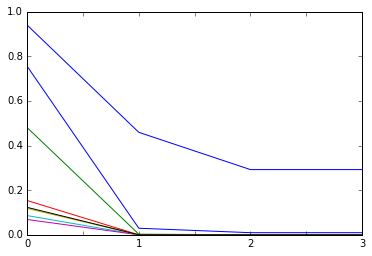

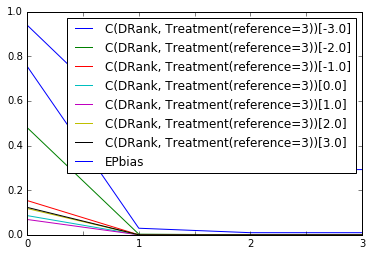

In [240]:
print mat_ps.T
mat_ps.plot(legend=False)
mat_ps.plot()

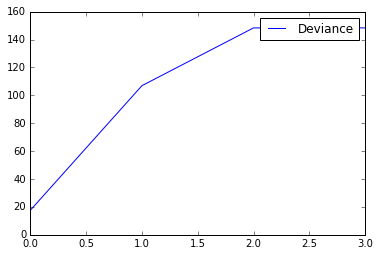

In [241]:
plt.plot(acounts,dev,label='Deviance')
plt.legend(loc='upper right')
plt.show()

# Group Ranks

In [173]:
levels = [e+1 for e in range(4)]
contrast = KRanksG().code_with_intercept(levels)
print contrast.matrix

[[ 1.  3.  0.  0.]
 [ 1. -1.  2.  0.]
 [ 1. -1. -1.  1.]
 [ 1. -1. -1. -1.]]


In [15]:
#Comments Ans_count AnsWordCount DRank Age_vot 
mod_ols = smf.ols(formula='np.log(Votes+1) ~ ReScore + Score + Pbias + C(AnsRank,KRanksG) -1', data= votes_r[votes_r.Ans_count<=4])
res = mod_ols.fit()
print res.summary()
##EPbias collinear with C(AnsRank,KRanks)

                            OLS Regression Results                            
Dep. Variable:      np.log(Votes + 1)   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                 1.080e+04
Date:                Mon, 04 Apr 2016   Prob (F-statistic):               0.00
Time:                        03:57:34   Log-Likelihood:                 6125.1
No. Observations:               11573   AIC:                        -1.224e+04
Df Residuals:                   11566   BIC:                        -1.218e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
C(An

In [84]:
fml = 'np.log(Votes+1) ~ ReScore + Pbias + Score +  C(AnsRank,KRanksG) -1'
mat = []
mses = []
r2s = []
alphas = np.arange(0, 0.26, 0.05)
for alpha in alphas:
    mod = sm.OLS.from_formula(fml, votes_r[votes_r.Ans_count<=4])
    rslt = mod.fit_regularized(alpha=alpha)
    mat.append(rslt.params)
    mses.append(rslt.mse_resid)
    r2s.append(rslt.rsquared)
mat = pd.DataFrame(mat[::-1], index=[str(x) for x in np.around(-np.log(alphas + 0.05),decimals=3)[::-1]])
print mat.T

                                       1.204     1.386     1.609     1.897  \
C(AnsRank, KRanksG)[K-r.intercept]  0.130896  0.217481  0.304066  0.390651   
C(AnsRank, KRanksG)[K-r.2]          0.030008  0.023093  0.016179  0.009264   
C(AnsRank, KRanksG)[K-r.3]          0.000000  0.000000  0.000000  0.000000   
C(AnsRank, KRanksG)[K-r.4]          0.000000  0.000000  0.000000  0.000000   
ReScore                             0.000000  0.000000  0.000000  0.000000   
Pbias                               0.000000  0.000000  0.000000  0.000000   
Score                               0.307152  0.292451  0.277750  0.263049   

                                       2.303     2.996  
C(AnsRank, KRanksG)[K-r.intercept]  0.477236  0.570149  
C(AnsRank, KRanksG)[K-r.2]          0.002350 -0.056268  
C(AnsRank, KRanksG)[K-r.3]          0.000000 -0.025600  
C(AnsRank, KRanksG)[K-r.4]          0.000000 -0.016460  
ReScore                             0.000000 -0.401547  
Pbias                            

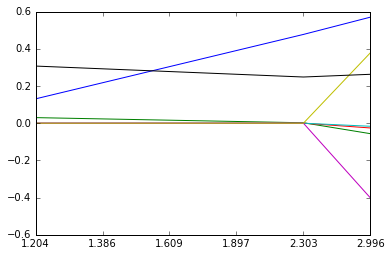

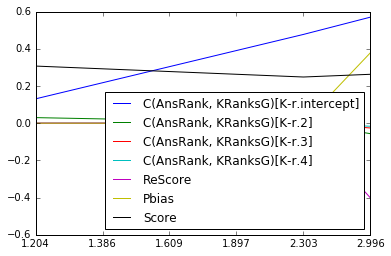

In [85]:
#With no regularization: Groups contribute positively with respect to top individual answers. Coefficients don't seem inflated, so interpretation is plausible.
# Pbias and ReScore die after first step of regularization (0.015). Score thrives
mat.plot(legend=False)
mat.plot()

## Kranks (NB: mean of contrast is relative to mean of individual effect of top answer)

In [10]:
levels = [e+1 for e in range(4)]
contrast = KRanks(1).code_with_intercept(levels)
print contrast.matrix

[[-1. -1. -1. -1.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [12]:
#Comments Ans_count AnsWordCount DRank Age_vot 
mod_ols = smf.ols(formula='np.log(Votes+1) ~ ReScore + Score + EPbias + C(AnsRank,KRanks(1)) -1', data= votes_r[votes_r.Ans_count<=4])
res = mod_ols.fit()
print res.summary()
##EPbias collinear with C(AnsRank,KRanks)

                            OLS Regression Results                            
Dep. Variable:      np.log(Votes + 1)   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 1.088e+04
Date:                Sun, 03 Apr 2016   Prob (F-statistic):               0.00
Time:                        02:50:46   Log-Likelihood:                 6162.6
No. Observations:               11573   AIC:                        -1.231e+04
Df Residuals:                   11566   BIC:                        -1.226e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
C(AnsRank, KRanks(

In [86]:
# Removes contrast tag against level to compare to (omit_i)
fml = 'np.log(Votes+1) ~ ReScore + EPbias + Score +  C(AnsRank,KRanks(1)) -1'
mat = []
mses = []
r2s = []
alphas = np.arange(0, 0.07, 0.01)
for alpha in alphas:
    mod = sm.OLS.from_formula(fml, votes_r[votes_r.Ans_count<=4])
    rslt = mod.fit_regularized(alpha=alpha)
    mat.append(rslt.params)
    mses.append(rslt.mse_resid)
    r2s.append(rslt.rsquared)
mat = pd.DataFrame(mat[::-1], index=[str(x) for x in np.around(-np.log(alphas + 0.01),decimals=3)[::-1]])
print mat.T

                                2.526     2.659     2.813     2.996     3.219  \
C(AnsRank, KRanks(1))[mean]  0.000000  0.000000  0.000000  0.000000  0.000000   
C(AnsRank, KRanks(1))[S.2]   0.000000  0.000000  0.000000  0.000000  0.031282   
C(AnsRank, KRanks(1))[S.3]   0.000000  0.000000  0.000000  0.000000  0.000000   
C(AnsRank, KRanks(1))[S.4]   0.000000  0.000000  0.000000  0.000000  0.000000   
ReScore                      0.034259  0.073109  0.111959  0.150808  0.172518   
EPbias                       0.369929  0.379168  0.388407  0.397646  0.443181   
Score                        0.302274  0.291494  0.280713  0.269932  0.260467   

                                3.507     3.912     4.605  
C(AnsRank, KRanks(1))[mean]  0.000000 -0.264903 -3.060290  
C(AnsRank, KRanks(1))[S.2]   0.063715  0.176830  0.762379  
C(AnsRank, KRanks(1))[S.3]   0.000000  0.070336  0.760198  
C(AnsRank, KRanks(1))[S.4]   0.000000  0.000000  0.761587  
ReScore                      0.193598  0.144608 -0.

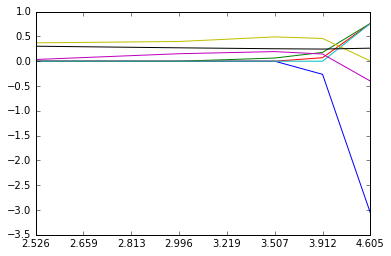

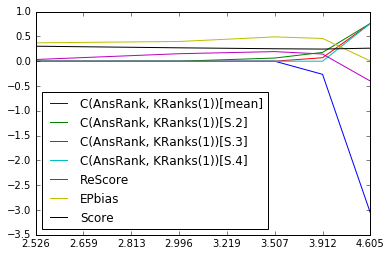

In [87]:
# Coefficients are small because these are relative increase/decrease
# After first setp of regularization(0.015) there's evidence for the model: (e.g. 2 optimizes w/r to 3)
# ReScore+EPbias+Score (all pos) + C(AnsRank,KRanks(2))[s.2,3,4] (neg e.g. pos 2 contributes positively w/r to 3)
#
#Interestingly, lower positions contribute positively compared to top position (rel to individual eff of first).
#Does this mean they compensate for Pbias,Score ? Also, note that C(AnsRank,KRanks(2))[s.2] has max value among contrasts (joint information with top pos)
#
# Note that C(AnsRank,KRanks(2))[s.2] and C(AnsRank,KRanks(2))[mean] die after (0.015)
# At 0.0 coeffs are really inflated (interpretation between -1,1 is not useless for Score,ReScore and EPbias at that point). Indeed, regularization is necessary
mat.plot(legend=False)
mat.plot()

## Poisson Regression

In [227]:
mod_poi = smf.glm('Votes ~ ReScore + EPbias + CumScore ', data=votes_r,
                  family=sm.families.Poisson(link=sm.families.links.log), offset=np.log(votes_r['Age_vot'] + 1)).fit(method='bfgs') 
#print mod_poi.mle_retvals['converged']
print mod_poi.summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Votes   No. Observations:                 8414
Model:                            GLM   Df Residuals:                     8410
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -15401.
Date:                Mon, 11 Apr 2016   Deviance:                       11086.
Time:                        00:01:02   Pearson chi2:                 1.53e+04
No. Iterations:                     8                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.9465      0.023    -40.817      0.000        -0.992    -0.901
ReScore       -1.2930      0.045    -29.006      0.0

## How does question quality relate to answer quality

In [19]:
#Comments Ans_count AnsWordCount DRank Age_vot
four_ans = smf.ols(formula='QReScore ~ ReScore + EPbias - 1 ', data=votes_r[votes_r['Ans_count']==4])
re_four = four_ans.fit()
print re_four.summary()

                            OLS Regression Results                            
Dep. Variable:               QReScore   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     1261.
Date:                Sat, 02 Apr 2016   Prob (F-statistic):          6.16e-214
Time:                        23:20:51   Log-Likelihood:                -181.87
No. Observations:                 593   AIC:                             367.7
Df Residuals:                     591   BIC:                             376.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ReScore        0.4712      0.037     12.674      0.0

In [106]:
mod_poi = smf.glm('QReScore ~ ReScore + EPbias - 1 ', data=votes[votes['Ans_count']==4],
                  family=sm.families.Poisson(link=sm.families.links.log)).fit(method='bfgs') #
#print mod_poi.mle_retvals['converged']
print mod_poi.summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:               QReScore   No. Observations:                 2172
Model:                            GLM   Df Residuals:                     2170
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2016.8
Date:                Sat, 02 Apr 2016   Deviance:                       168.97
Time:                        14:28:45   Pearson chi2:                     143.
No. Iterations:                     7                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ReScore        0.0081      0.067      0.121      0.904        -0.123     0.139
EPbias        -0.7037      0.172     -4.091      0.0

In [6]:
from patsy.contrasts import ContrastMatrix

def _name_levels(prefix, levels):
    return ["[%s%s]" % (prefix, level) for level in levels]

class KRanksG(object):
    """K-rank contrasts.
       Compare relative effect on output variable for a given level
       against all those below.
       
       # Reduced rank
       dmatrix("C(a, KRanks)", balanced(a=4))
       # Full rank
       dmatrix("0 + C(a, KRanks)", balanced(a=4))
    """
    def _kranksg_contrast(self, levels):
        n = len(levels)
        contr = np.zeros((n, n - 1))
        contr[:-1][np.diag_indices(n - 1)] = np.arange(1, n)[::-1]
        rows,cols = np.tril_indices(n-1)
        contr[(rows+1,cols)] = -1
        return contr

    def code_with_intercept(self, levels):
        contrast = np.column_stack((np.ones(len(levels)),
                                    self._kranksg_contrast(levels)))
        column_suffixes = _name_levels("K-r.", ["intercept"] + list(levels[1:]))
        return ContrastMatrix(contrast, column_suffixes)

    def code_without_intercept(self, levels):
        contrast = self._kranksg_contrast(levels)
        return ContrastMatrix(contrast, _name_levels("K-r.", levels[1:]))
                              

In [7]:
from patsy.contrasts import ContrastMatrix
class KRanks(object):
    """
       # Reduced rank
       dmatrix("C(a, TwoRanks)", balanced(a=4))
       # Full rank
       dmatrix("0 + C(a, TwoRanks)", balanced(a=4))
       # Omit a different level
       dmatrix("C(a, TwoRanks(1))", balanced(a=3))
       dmatrix("C(a, TwoRanks('a1'))", balanced(a=3))
    """
    #We assume levels are all different
    def _get_level(self,levels,omit):
        return levels.index(omit)
    
    def __init__(self, omit=None):
        self.omit = omit

    def _omit_i(self, levels):
        if self.omit is None:
            # We assume below that this is positive
            return len(levels) - 1
        else:
            return self._get_level(levels, self.omit)

    def _kranks_contrast(self, levels):
        n = len(levels)
        omit_i = self._omit_i(levels)
        #self._omit_i(levels)
        eye = np.eye(n - 1)
        out = np.empty((n, n - 1))
        out[:omit_i, :] = eye[:omit_i, :]
        out[omit_i, :] = -1
        out[omit_i + 1:, :] = eye[omit_i:, :]
        return out

    def code_with_intercept(self, levels):
        contrast = self.code_without_intercept(levels)
        n_zeros = np.zeros(len(levels))
        np.put(n_zeros,0,[-1])
        matrix = np.column_stack((n_zeros,
                                  contrast.matrix))
        column_suffixes = ["[mean]"] + contrast.column_suffixes
        return ContrastMatrix(matrix, column_suffixes)

    def code_without_intercept(self, levels):
        matrix = self._kranks_contrast(levels)
        omit_i = self._omit_i(levels)
        included_levels = levels[:omit_i] + levels[omit_i + 1:]
        return ContrastMatrix(matrix, _name_levels("S.", included_levels))


In [176]:
from patsy.contrasts import *
Treatment??